In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
hab=pd.read_csv('haberman.csv')
print(hab.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [25]:
hab["age"].value_counts().head()
hab.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [26]:
hab["status"].unique()

array([1, 2], dtype=int64)

In [9]:
hab['status'] = hab['status'].map({1:"yes", 2:"no"})
hab['status']=hab['status'].astype('category')
hab['status'].head()

0    yes
1    yes
2    yes
3    yes
4    yes
Name: status, dtype: category
Categories (2, object): [no, yes]

hab.describe()

In [10]:
hab['status'].iloc[:-1].value_counts(normalize=True)

yes    0.737705
no     0.262295
Name: status, dtype: float64

observation:
totally mean of 52 age people 
75% of people gets 4 positive nodes and 25% have 0 nodes
73% people are cured

C:\Users\KuttySelva\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\KuttySelva\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


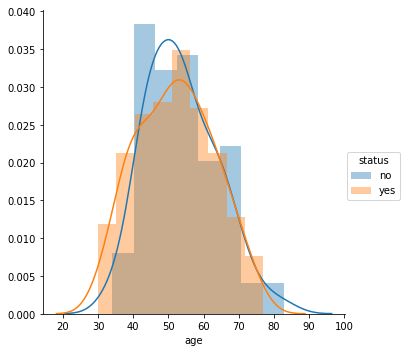

C:\Users\KuttySelva\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\KuttySelva\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


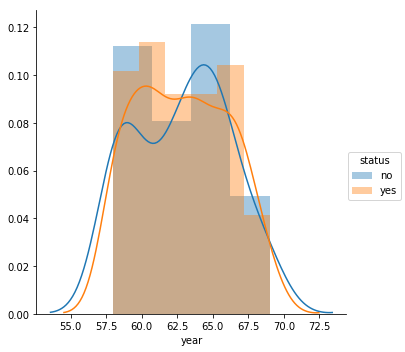

C:\Users\KuttySelva\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\KuttySelva\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


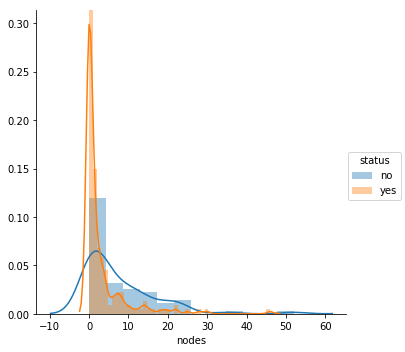

In [11]:
import matplotlib.pyplot as plt
for ind,feature in enumerate(list(hab)[:-1]):
    fd=sns.FacetGrid(hab,hue="status",size=5)
    fd.map(sns.distplot,feature).add_legend()
    plt.show()

pdf : {} [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
cdf : {} [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


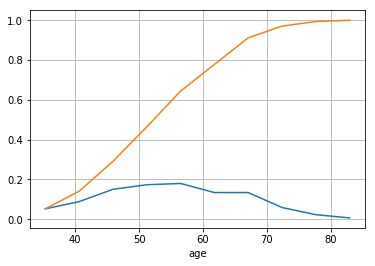

pdf : {} [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
cdf : {} [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


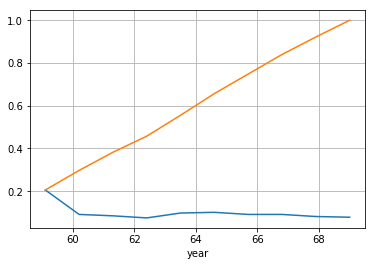

pdf : {} [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
cdf : {} [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


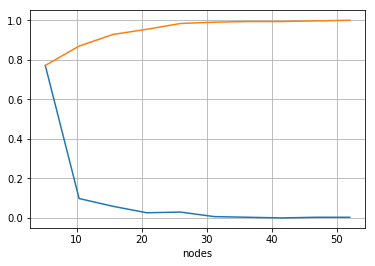

In [13]:
#plt.figure(figsize=(20,8))
for ind,feature in enumerate(list(hab)[:-1]):
    #plt.subplot(1,3,ind+1)
    count,bin_edges=np.histogram(hab[feature],bins=10,density=True)
    pdf=count/sum(count)
    print("pdf : {}",format(pdf))
    cdf=np.cumsum(pdf)
    print("cdf : {}",format(cdf))
    plt.plot(bin_edges[1:],pdf,bin_edges[1:],cdf)
    plt.xlabel(feature)
    plt.grid()
    plt.show()
    

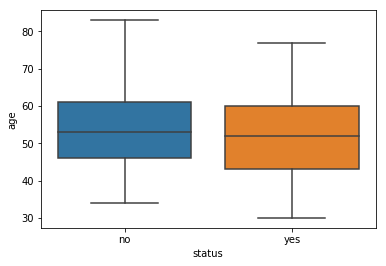

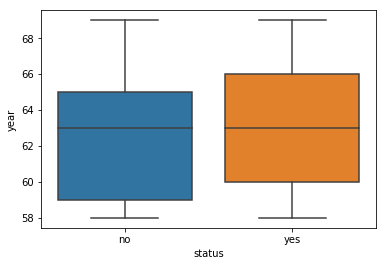

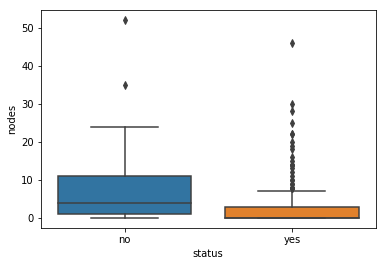

In [17]:
for ind,feature in enumerate(list(hab.columns)[:-1]):
    sns.boxplot(x='status',y=feature,data=hab)
    plt.show()

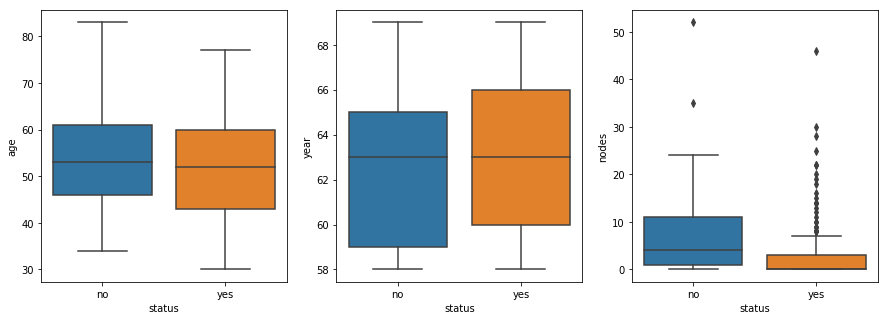

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(hab.columns)[:-1]):
    sns.boxplot( x='status', y=feature, data=hab, ax=axes[idx])
plt.show()

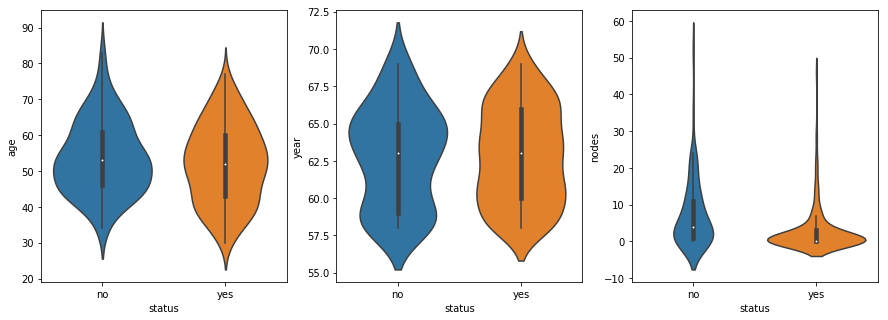

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(hab.columns)[:-1]):
    sns.violinplot( x='status', y=feature, data=hab, ax=axes[idx])
plt.show()

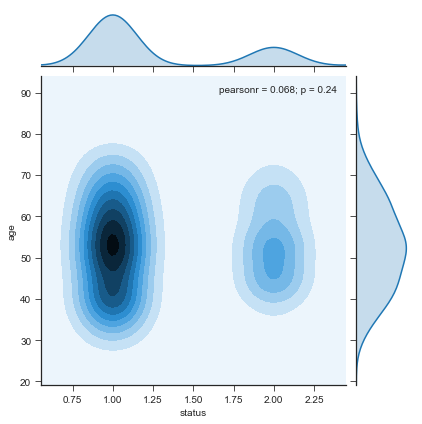

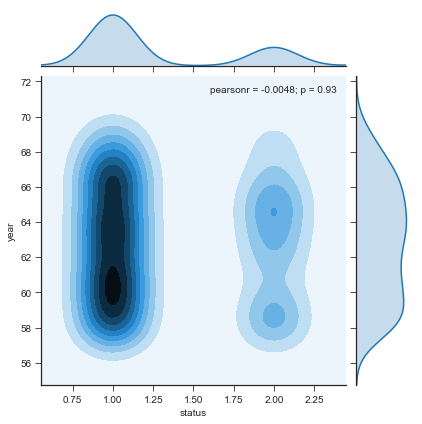

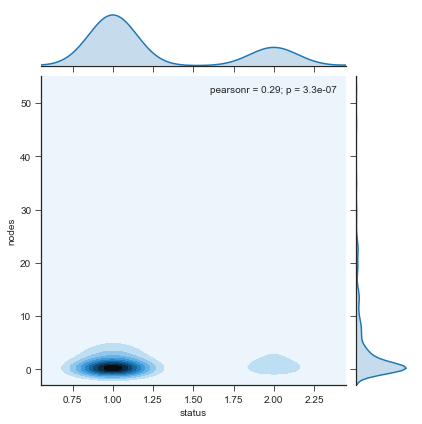

In [53]:
#multivariate analysis
#2d depth plot

for idx, feature in enumerate(list(hab.columns)[:-1]):
    sns.jointplot( x='status', y=feature, data=hab, kind='kde')
plt.show()

observations:
from age to status
    cured people have age range of 50 to 55 , not cured people have 45 to 50 age range
from year to status people who admitted at year 1959 to 1962 have higher possibility to cure
in year 64 to 66 have high possibility to not cure

from nodes to status
    people who have more than 1 lymph nodes have high possibility to cure , people have 1 have high possibility to not cure

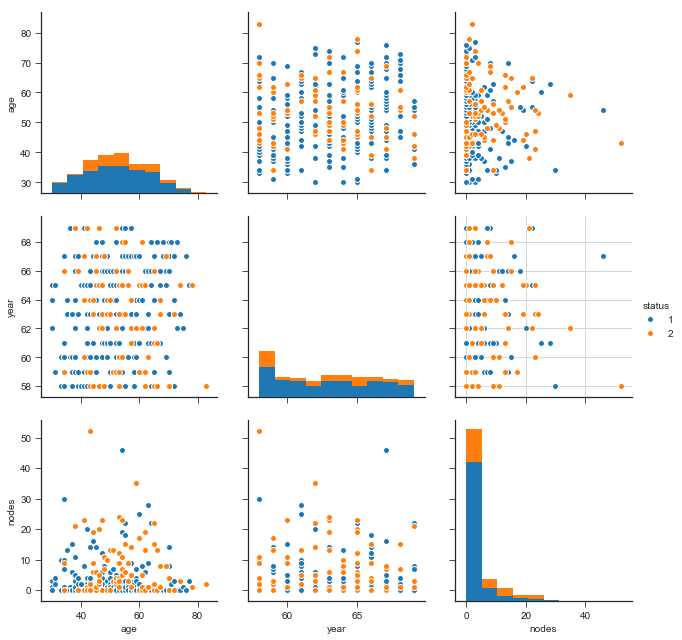

In [51]:
#pair plots
sns.set_style("ticks")
sns.pairplot(hab,hue="status",vars=['age','year','nodes'],size=3)
plt.grid()
plt.show()

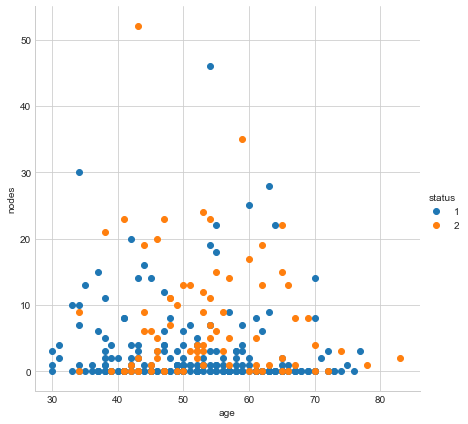

In [56]:
sns.set_style("whitegrid");
sns.FacetGrid(hab, hue="status", size=6) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();